# <center> Car Accident Severity </center>

<img src="./images/ian-valerio-9UxW_MqBGe4-unsplash.jpg" />

## Why? (introduction)

### Q: Clearly define a problem or an idea of your choice. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This work is aimed at society in general and the objective is to generate social awareness regarding traffic accidents, for that reason the language will be simple. Taking into account that traffic accidents represent the death of 1.3 million people around the world each year (*World Health Organization*, link https://www.who.int/features/factfiles/roadsafety/es/), in this This work aims to better understand this type of accident, and evaluate which are the most relevant factors for their occurrence. According to the *World Health Organization*, victims (worldwide) correspond to passersby in 50% of cases, it is also explained that most accidents in general occur due to human errors, however there are also environmental factors, automobile, or the roads. Mainly we are going to use Machine Learning to create a model that classifies accidents according to their level of severity in order to predict the probability of an accident according to new features.

We will use the *Collisions — All Years* database provided by *SDOT Traffic Management Division of Seattle*

#### in spanish 
Este trabajo esta dirijido para la sociedad en general y el objetivo es generar conciencia social respecto a los accidentes de trafico, por eso motivo el lenguaje será sencillo. Tomando en cuenta que los accidentes de tráfico representan la muerte de 1.3 millones de personas al rededor del mundo cada año (*World Health Organization*, link https://www.who.int/features/factfiles/roadsafety/es/), en este trabajo se pretende comprender mejor este tipo de accidentes, y evaluar cuales son los factores más relevantes para que ocurran. Según *The World Health Organization*, las victimas (a nivel mundial) corresponde a transeuntes en un 50% de los casos, también se explica que la mayoria de los accidentes en genera ocurren por errores humanos, sin embargo también existen factores ambientales, del automovil, o de las carreteras. Principalmente vamos usar Machine Learning para crear un modelo que clasifique los accidentes segun su nivel de severidad para poder predecir la probabilidad de un accidente segun nuevos features. 



## About the data

In [ ]:
import numpy as np 
import pandas as pd 

### Q: Describe the data that you will be using to solve the problem or execute your idea. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using.

Describe los datos que usarás para resolver el problema o ejecutar tu idea. Por lo tanto, asegúrese de brindar una explicación y discusión adecuadas, con ejemplos, de los datos que utilizará.

In [81]:
df=pd.read_csv('./Data/Data-Collisions.csv')
print(df.shape)
print(f'The columns names are:', list(df.columns))

(194673, 38)
The columns names are [&#39;SEVERITYCODE&#39;, &#39;X&#39;, &#39;Y&#39;, &#39;OBJECTID&#39;, &#39;INCKEY&#39;, &#39;COLDETKEY&#39;, &#39;REPORTNO&#39;, &#39;STATUS&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;LOCATION&#39;, &#39;EXCEPTRSNCODE&#39;, &#39;EXCEPTRSNDESC&#39;, &#39;SEVERITYCODE.1&#39;, &#39;SEVERITYDESC&#39;, &#39;COLLISIONTYPE&#39;, &#39;PERSONCOUNT&#39;, &#39;PEDCOUNT&#39;, &#39;PEDCYLCOUNT&#39;, &#39;VEHCOUNT&#39;, &#39;INCDATE&#39;, &#39;INCDTTM&#39;, &#39;JUNCTIONTYPE&#39;, &#39;SDOT_COLCODE&#39;, &#39;SDOT_COLDESC&#39;, &#39;INATTENTIONIND&#39;, &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;, &#39;PEDROWNOTGRNT&#39;, &#39;SDOTCOLNUM&#39;, &#39;SPEEDING&#39;, &#39;ST_COLCODE&#39;, &#39;ST_COLDESC&#39;, &#39;SEGLANEKEY&#39;, &#39;CROSSWALKKEY&#39;, &#39;HITPARKEDCAR&#39;]


I will use the Collisions database - Every year provided by the Seattle SDOT Traffic Management Division. The data is made up of 194673 cases, and contains 38 characteristics which I will separate into four groups:

a) There are some **characteristics that are not relevant** for our purpose, for example those that correspond to identification codes (id), there are also repeated characteristics or characteristics with little information.

b) There are **features that may not be relevant to apply machine learning techniques but that are relevant to better understand the problem**, for example the location and coordinates.

c) Finally there are **features that I don't know if they will really be useful to me**.

d) On the other hand, there are those **characteristics that probably have a strong influence on the severity** of the accident. Even these have to be worked on because many contain a numerical code that does not refer to a numerical value but is an identification code for a certain type of accident.



Next I will make an explanation of each of these groups.

Utilizaré la base de datos Collisions—All Years que nos provee SDOT Traffic Management Division de Seattle. Los datos estan conformados por 194673 casos, y contiene 38 features los cuales separaré en cuatro grupos:

a) Hay algunos features que no son relevantes para nuestro proposito por ejemplo aqullos que corresponden a codigos de identificación (id), también existen features repetidos o features con poca información. 

b) Existen features que quizas no son relevantes para aplicar técnicas de machine learning pero que si lo son para comprender mejor el problema, por ejemplo la ubicación y las coordenadas.

b) Por otro lado estan aquellos features que muy probablemente tengan una fuerte influencia sobre la severidad del accidente. Incluso estos hay que trabajarlos porque muchos contienen un codigo numerico que no se refiere a un valor numerico sino es un codigo de identificación para cierto tipo de accidente. 

c) Existen features que quizas no son relevantes para aplicar técnicas de machine learning pero que si lo son para comprender mejor el problema, por ejemplo la ubicación y las coordenadas. 

d) Finalmente existen features que no sé si realmente me serán utiles. 

Acontinuación hare una explicación de cada uno de estos grupos. 

### a) Not revelant
OBJECTID (id), INCKEY(id), COLDETKEY(id), REPORTNO(id), EXCEPTRSNCODE(id), SEVERITYCODE.1(repeted), ST_COLCODE (obs SDOT_COLCODE son distints?),SEGLANEKEY (few information), CROSSWALKKEY (few information), HITPARKEDCAR (few information),
SEVERITYDESC(is included in other variable).
I will drop those

### b) Revelant for a better understanding of the problem
X and Y coordinates (i can make a map with those), and LOCATION (Becouse there are some information abour where are the names of the less safe locations, like Battery st. tunnel)

In [83]:
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
N 36TH ST BETWEEN CARR PL N AND WOODLAWN AVE N                      1
63RD AVE S BETWEEN S NORFOLK ST AND S COOPER ST                     1
ALKI TRL BETWEEN SW FLORIDA ST AND DUWAMISH HEAD                    1
S DAWSON ST BETWEEN 37TH AVE S AND 39TH AVE S                       1
S HUDSON ST BETWEEN 2ND AVE S AND 3RD AVE S                         1
Name: LOCATION, Length: 24102, dtype: int64

### c) Maybe relevant
STATUS *mached or not*, \*, <br>
INTKEY *Key that corresponds to the intersection*, \* <br>
EXCEPTRSNDESC *Not Enough Information, or Insufficient Location Information*, it tell me if there enough info
associated with a collision <br>
PEDROWNOTGRNT *Whether or not the pedestrian right of way wasnot granted. (Y/N)*, 4667 Y<br>
SPEEDING *Whether or not speeding was a factor in the collision.*

\*there are other variables that can provide this info

### d) Revelant

SEVERITYCODE *severity*, this is the LABEL!, obse there are just two values: 1 (*Property Damage Only Collision*) and 2 (*Injury Collision*)<br> 
ADDRTYPE *types*: block intersection, alley<br>
COLLISIONTYPE *type of collision*<br> 	
PERSONCOUNT *the total number of people involved in the collision* <br>
PEDCOUNT *number of pedestrians, This is entered by the state.*<br>
PEDCYLCOUNT *the number of bicycles involved in the collision. This is entered by the state.*<br>
VEHCOUNT *the number of vehicles involved in the collision. This is entered by the state.*<br> 
INCDATE	*Just date* <br>
INCDTTM *Date and time* This label can answer the question: In which day or hour are ore probabilities of an accident<br> 
JUNCTIONTYPE *Category of junction at which collision took place, i think thay maybe this is correlated to other variable*<br>
SDOT_COLCODE *The code of the collision description*<br>
SDOT_COLDESC *The description of the collision*<br>
UNDERINFL *Whether or not a driver involved was under the influence of drugs or alcohol.* it is in code!<br>
WEATHER (*clear, raining, overcast, etc.*) <br>
ROADCOND *Road conditions* <br>
LIGHTCOND *light conditions* <br>

In [104]:
print(df['SEVERITYCODE'].value_counts())
print('')
print(df['SEVERITYDESC'].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


In [87]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [105]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [96]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [114]:
import matplotlib.pyplot as plt

(array([5.54400e+03, 1.31540e+04, 1.14231e+05, 3.55530e+04, 1.46600e+04,
        6.58400e+03, 2.70200e+03, 1.13100e+03, 5.33000e+02, 2.16000e+02,
        1.28000e+02, 5.60000e+01, 3.30000e+01, 2.10000e+01, 1.90000e+01]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 &lt;BarContainer object of 15 artists&gt;)

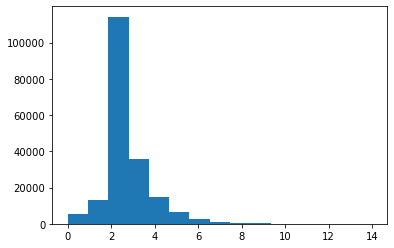

In [142]:
plt.hist(df['PERSONCOUNT'][df['PERSONCOUNT']<15], bins=15)##


In [ ]:
Me interesa: SEVERITYCODE (severity) obs solo tenemos dos posibles valores 1 y 2. ADDRTYPE(Tipo block intersection, alley),SEVERITYDESC son las descripciones de la severidad, COLLISIONTYPE (tipo de colision), 	PERSONCOUNT (The total number of people involved in thecollision), PEDCOUNT(number of pedestrians, This is entered by the state.), PEDCYLCOUNT, VEHCOUNT, INCDATE	(fecha), INCDTTM (fecha y hora), JUNCTIONTYPE (Category of junction at which collision took place, creo que esto esta relacionado con otra variable, junction tal vez), SDOT_COLCODE(esto esta con codigo), SDOT_COLDESC. UNDERINFL(Whether or not a driver involved was under the influence of drugs or alcohol.). WEATHER (clima). ROADCOND(condiciones de la carretera). LIGHTCOND (Condiciones de la luz). 

Ubicaciónes: X e Y son la ubicación (me sirve para graficar.) LOCATION Contiene varias calles (seria util para graficos.)

No me interesa OBJECTID, INCKEY, COLDETKEY, REPORTNO, EXCEPTRSNCODE, SEVERITYCODE.1(esta repetido), ST_COLCODE (obs SDOT_COLCODE son distints?),SEGLANEKEY	 , CROSSWALKKEY, HITPARKEDCAR

No lo sé: STATUS (mached or no), INTKEY(Key that corresponds to the intersection, EXCEPTRSNDESC (Not Enough Information, or Insufficient Location Information    5638)
associated with a collision), PEDROWNOTGRNT(Si el derecho de paso para peatones fue
no garantizado4667Y), SPEEDING Whether or not speeding was a factor in the
collision. 

In [74]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [71]:
df['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [42]:
df[['SEVERITYCODE','SEVERITYCODE.1']].corr()

,SEVERITYCODE,SEVERITYCODE.1
SEVERITYCODE,1.0,1.0
SEVERITYCODE.1,1.0,1.0
